## Project Description

Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.



# 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.

# Import Libraries

In [42]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [43]:
# Import necessary modules.

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Conv2D, Flatten, Dropout, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential

import seaborn as sns


## Load dataset

In [44]:

#Defining the path of the dataset
project_path = '/content/drive/My Drive/AIML/Project7/'
dataset_file = project_path + 'images.npy'
labels_file = project_path + 'Labels.csv'

In [45]:
data=np.load(dataset_file) # loads the images

In [46]:
labels = pd.read_csv(labels_file) # loads the labels for the images

## Print shape of data

In [47]:
data.shape # shape of the images

(4750, 128, 128, 3)

In [48]:
labels.shape # shape of the labels

(4750, 1)

**Insights:** There are 4750 color photos that are 128x128

## Visualize the images in dataset. 

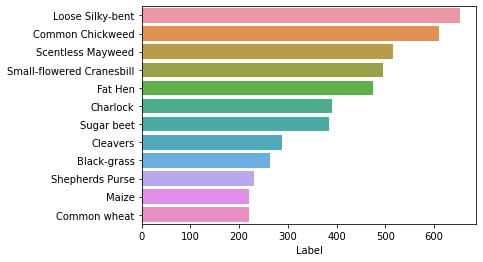

In [49]:

sns.barplot(y=labels.Label.value_counts().index, x=labels.Label.value_counts());


**Insights:** The data set is imbalanced

This is a Small-flowered Cranesbill


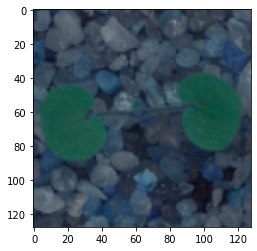


 

This is a Fat Hen


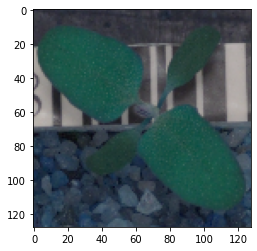


 

This is a Shepherds Purse


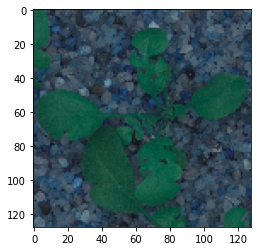


 

This is a Common Chickweed


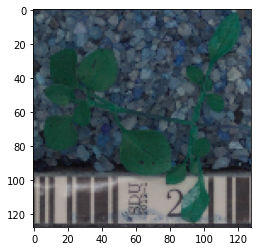


 

This is a Common Chickweed


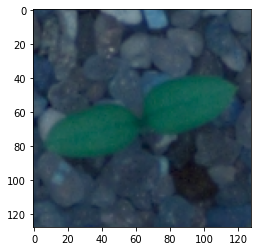


 

This is a Cleavers


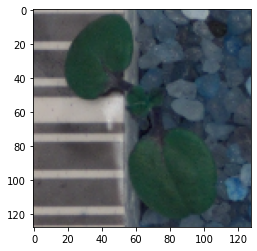


 

This is a Scentless Mayweed


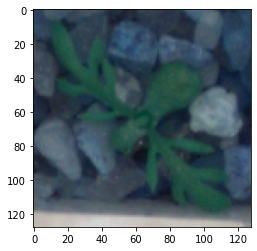


 

This is a Sugar beet


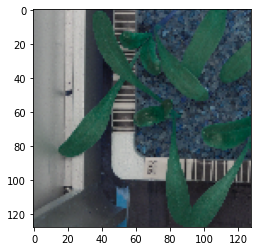


 

This is a Black-grass


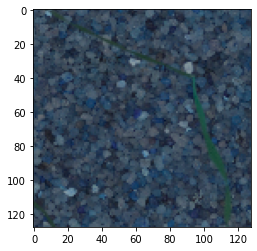


 

This is a Loose Silky-bent


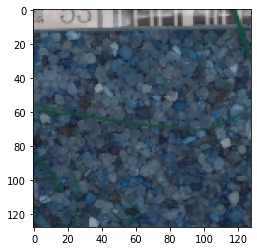

In [50]:
# Review a few of the images 

for img in range(0, 4750, 500):
  print('This is a',labels['Label'][img])
  plt.imshow(data[img])
  plt.show()
  print('\n \n')

# 2. Data Pre-processing:

## 2a. Normalization. 

Normalize the data in preparation of modeling. Using 255 to normalize since the intensities can be from 0 to 255

In [51]:
data_norm = data.astype('float32') / 255.0

In [52]:
data_norm.shape # check the shape of data. 

(4750, 128, 128, 3)

## 2b. Gaussian Blurring. 

Using 5x5 Gaussing Blurring to help smooth the images which will make it easier for the model to classify images due to the fact the edges won't have as much noise

In [53]:
data_norm_gauss = np.empty((4750, 128, 128,3)) 

In [54]:
data_norm_gauss.shape

(4750, 128, 128, 3)

In [55]:
for idx, img in enumerate(data_norm):
  data_norm_gauss[idx] = cv2.GaussianBlur(img, (5, 5), 0)

## 2c. Visualize data after pre-processing. 


 
 This is a Small-flowered Cranesbill before normalization


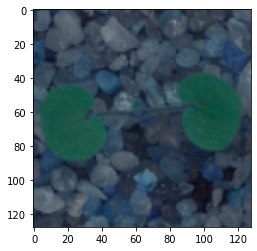


 
 This is a Small-flowered Cranesbill after normalization


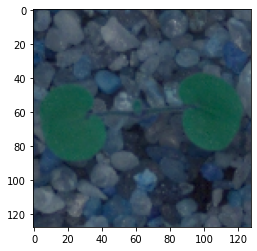


 
 This is a Small-flowered Cranesbill after normalization,5x5 GaussianBlur


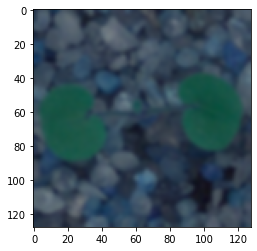


 
 This is a Fat Hen before normalization


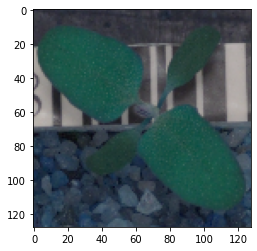


 
 This is a Fat Hen after normalization


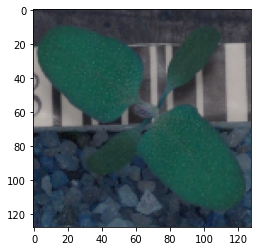


 
 This is a Fat Hen after normalization,5x5 GaussianBlur


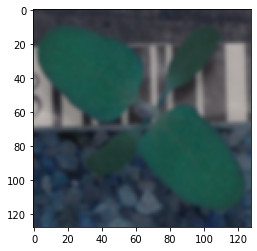


 
 This is a Shepherds Purse before normalization


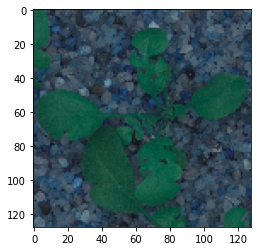


 
 This is a Shepherds Purse after normalization


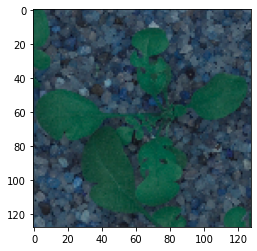


 
 This is a Shepherds Purse after normalization,5x5 GaussianBlur


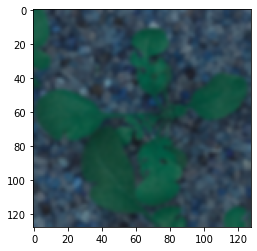


 
 This is a Common Chickweed before normalization


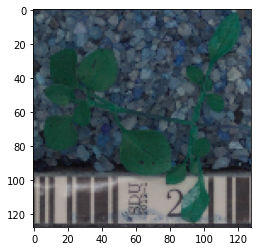


 
 This is a Common Chickweed after normalization


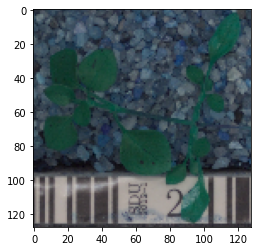


 
 This is a Common Chickweed after normalization,5x5 GaussianBlur


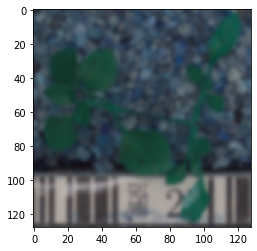


 
 This is a Common Chickweed before normalization


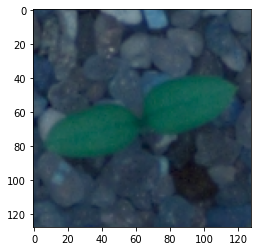


 
 This is a Common Chickweed after normalization


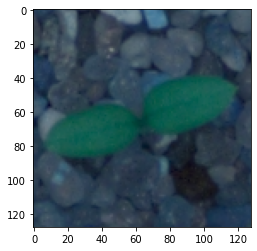


 
 This is a Common Chickweed after normalization,5x5 GaussianBlur


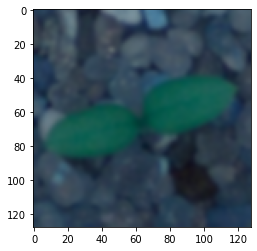


 
 This is a Cleavers before normalization


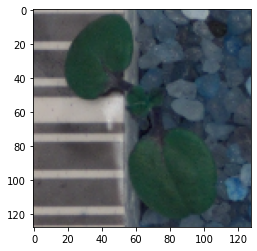


 
 This is a Cleavers after normalization


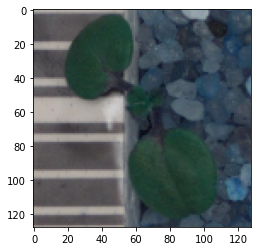


 
 This is a Cleavers after normalization,5x5 GaussianBlur


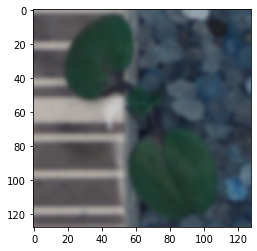


 
 This is a Scentless Mayweed before normalization


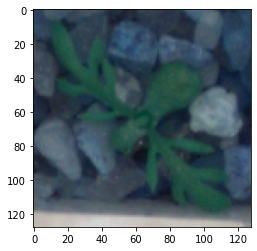


 
 This is a Scentless Mayweed after normalization


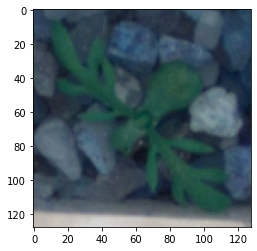


 
 This is a Scentless Mayweed after normalization,5x5 GaussianBlur


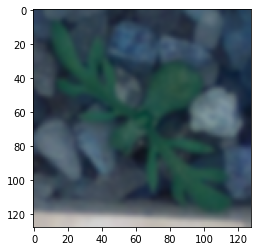


 
 This is a Sugar beet before normalization


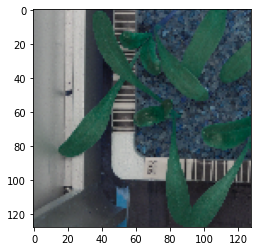


 
 This is a Sugar beet after normalization


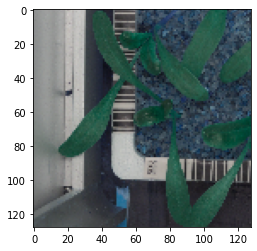


 
 This is a Sugar beet after normalization,5x5 GaussianBlur


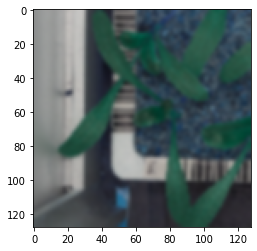


 
 This is a Black-grass before normalization


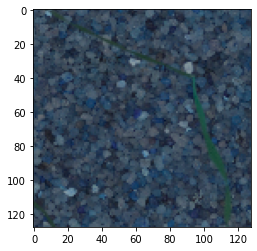


 
 This is a Black-grass after normalization


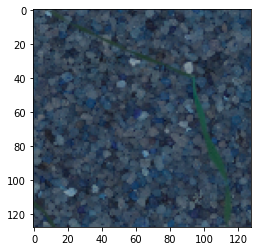


 
 This is a Black-grass after normalization,5x5 GaussianBlur


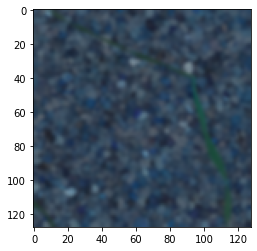


 
 This is a Loose Silky-bent before normalization


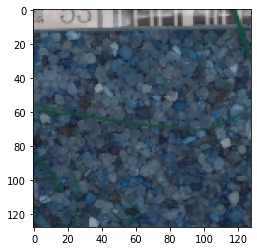


 
 This is a Loose Silky-bent after normalization


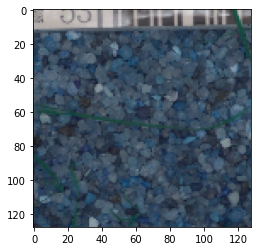


 
 This is a Loose Silky-bent after normalization,5x5 GaussianBlur


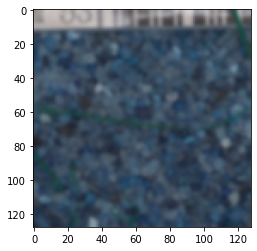

In [56]:
for img in range(0, 4750, 500):
  print('\n \n This is a' ,labels['Label'][img],'before normalization')
  plt.imshow(data[img])
  plt.show()
  print('\n \n This is a' ,labels['Label'][img],'after normalization')
  plt.imshow(data_norm[img])
  plt.show()
  print('\n \n This is a' ,labels['Label'][img],'after normalization,5x5 GaussianBlur')
  plt.imshow(data_norm_gauss[img])
  plt.show()

## 3. Make data compatible:

## 3a. Convert labels to one-hot-vectors. 

Converting the labels to 1 hot coding since we will use CNN we will need 12 neurons one for each class

In [57]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)
y=y.astype('float32')

In [58]:
enc.classes_ #review classes

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

In [59]:
integer_mapping = {l: i for i, l in enumerate(enc.classes_)} # creating mappings for classes

In [60]:
label_mapping = dict(map(reversed, integer_mapping.items()))# creating mappings for classes

## 3b. Print the label for y[0]. 

In [61]:
print('This is label for y[0]',enc.inverse_transform(y[[0]])) 

This is label for y[0] ['Small-flowered Cranesbill']


In [62]:
print('Raw array for y[0]' ,y[0])

Raw array for y[0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## 3c. Split the dataset into training, testing, and validation set

In [63]:
X = data_norm_gauss.copy() #Creating X 
X=X.astype('float32') #Converting to float32 to ensure compatiblity 

In [64]:
print('X object type is',type(X))
print('Shape of X is',X.shape)
print('Element type is',X.dtype,'\n')
print('y object type is',type(y))
print('Shape of y is',y.shape)
print('Element type is',y.dtype)

X object type is <class 'numpy.ndarray'>
Shape of X is (4750, 128, 128, 3)
Element type is float32 

y object type is <class 'numpy.ndarray'>
Shape of y is (4750, 12)
Element type is float32


In [65]:
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=2)

## d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape. 

In [66]:
print('Shape of X_train is',X_train.shape)
print('Shape of X_train is',X_test.shape)
print('Shape of y_train is',y_train.shape)
print('Shape of y_test is',y_test.shape)

Shape of X_train is (3325, 128, 128, 3)
Shape of X_train is (1425, 128, 128, 3)
Shape of y_train is (3325, 12)
Shape of y_test is (1425, 12)


**Insights:** Data is in correct shape since i am using color. 128x128 with 3 channels. The y has 12 variables for the 12 different classes. Everything is ready for the model

# 4. Building CNN:

## 4 a. Define layers. 
## 4b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.) 


-define a sequential model
- Use data augmentation
- add  convolutional layer
- no of filters: 32
- kernel size: 3x3
- activation: "relu"
- input shape: (128, 128, 3) for first layer
- Use padding
- add a max pooling layer of size 2x2
- add  convolutional layer
- no of filters: 32
- kernel size: 3x3
- activation: "relu"
- add a max pooling layer of size 2x2
- add  convolutional layer
- no of filters: 64
- kernel size: 3x3
- activation: "relu"
-flatten the data
-add Flatten layer
-add 2 dense layers
-number of neurons in first layer: 128
- number of neurons in last layer: 12
activation function in first layer: relu
activation function in last layer: softmax


In [67]:
# Since there isn't much data, creating data augmentation to help with overfitting and predicting powere

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [68]:
model = Sequential() #initialize model
model.add(data_augmentation) # add the data augmentation
model.add(Conv2D(filters=32, kernel_size=3, padding='same',activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

# Compile the model
# Using Categorical Crossentropy for loss function and Adam as an optimizer
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")



# 5. Fit and evaluate model and print confusion matrix

In [69]:
# Fit the model
# run 50 epochs with batch size of 32
history =model.fit( x=X_train, y=y_train, batch_size=32, epochs=50, validation_split = 0.5)

Epoch 1/50
52/52 [==============================] - 2s 18ms/step - loss: 2.4219 - accuracy: 0.1631 - val_loss: 2.2652 - val_accuracy: 0.2069
Epoch 2/50
52/52 [==============================] - 1s 15ms/step - loss: 1.9244 - accuracy: 0.3279 - val_loss: 1.6884 - val_accuracy: 0.4029
Epoch 3/50
52/52 [==============================] - 1s 14ms/step - loss: 1.5809 - accuracy: 0.4537 - val_loss: 1.4551 - val_accuracy: 0.4901
Epoch 4/50
52/52 [==============================] - 1s 15ms/step - loss: 1.3632 - accuracy: 0.5241 - val_loss: 1.2642 - val_accuracy: 0.5743
Epoch 5/50
52/52 [==============================] - 1s 14ms/step - loss: 1.2301 - accuracy: 0.5698 - val_loss: 1.2397 - val_accuracy: 0.5785
Epoch 6/50
52/52 [==============================] - 1s 14ms/step - loss: 1.1863 - accuracy: 0.5890 - val_loss: 1.2098 - val_accuracy: 0.5959
Epoch 7/50
52/52 [==============================] - 1s 15ms/step - loss: 1.1028 - accuracy: 0.6245 - val_loss: 1.0288 - val_accuracy: 0.6663
Epoch 8/50
52

In [70]:
model.summary() # here is a summary of the model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 65536)            

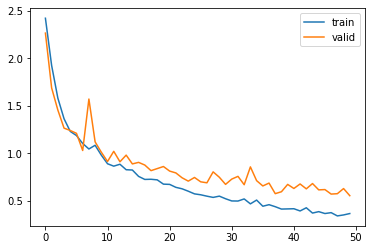

In [71]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0);

**Insights:**

The model performed well considering the small data. There is a slight over fitting but nothing major

In [72]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 6ms/step - loss: 0.6022 - accuracy: 0.8295


[0.602171003818512, 0.8294736742973328]

**Insights:** 
On the test set, we have 80% accuracy which is roughly the same as the training and test data set. We could training the model more and use dropout layers and more data argumentation to help improve accuracy

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

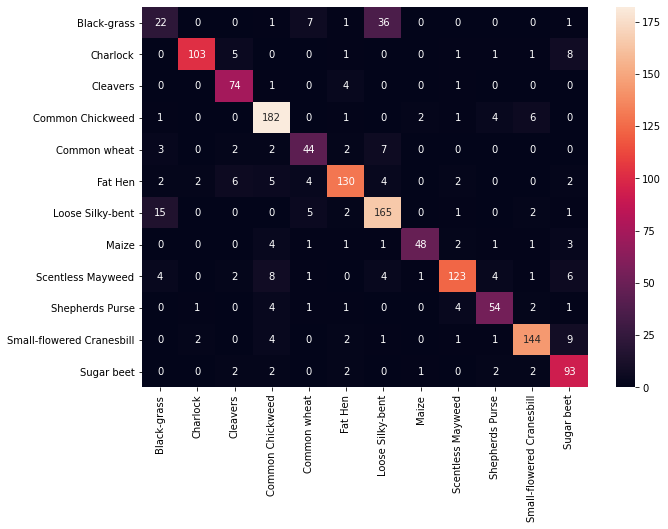

In [74]:
# Create Confusion Matrix

y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
result = np.argmax(y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [label_mapping[i] for i in range(0, 12)],
                  columns = [label_mapping[i] for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

**Insights:** 
The model had a hard time telling the difference between Black-grass and Loose Silky-bent, but performed well on the other 10 plants

In [75]:
result.shape

(1425,)

In [76]:
print("=== Classification Report ===")
print(classification_report(Y_true, result))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.47      0.32      0.38        68
           1       0.95      0.86      0.90       120
           2       0.81      0.93      0.87        80
           3       0.85      0.92      0.89       197
           4       0.70      0.73      0.72        60
           5       0.88      0.83      0.86       157
           6       0.76      0.86      0.81       191
           7       0.92      0.77      0.84        62
           8       0.90      0.80      0.85       154
           9       0.81      0.79      0.80        68
          10       0.91      0.88      0.89       164
          11       0.75      0.89      0.82       104

    accuracy                           0.83      1425
   macro avg       0.81      0.80      0.80      1425
weighted avg       0.83      0.83      0.83      1425



# 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks) 

X_test[ 2 ] is Charlock and predicted as Small-flowered Cranesbill


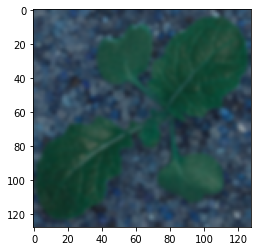


 

X_test[ 3 ] is Scentless Mayweed and predicted as Scentless Mayweed


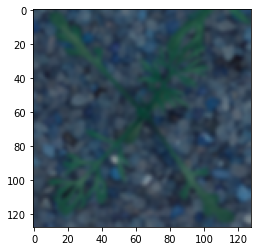


 

X_test[ 33 ] is Loose Silky-bent and predicted as Loose Silky-bent


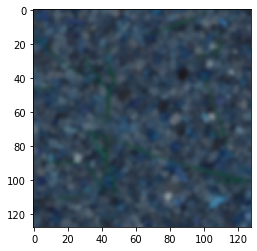


 

X_test[ 36 ] is Shepherds Purse and predicted as Shepherds Purse


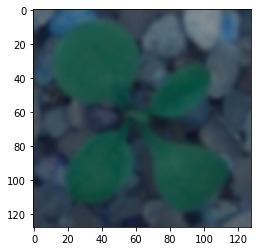


 

X_test[ 59 ] is Fat Hen and predicted as Fat Hen


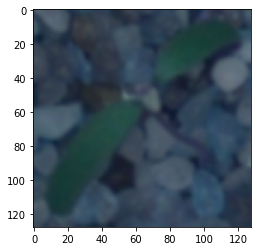

In [77]:
for img in [2,3,33,36,59]:
  print('X_test[',img,']' ,'is', label_mapping[Y_true[img]],'and predicted as',label_mapping[result[img]])

  plt.imshow(X_test[img])
  plt.show()

  print('\n \n')
